In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.cluster import KMeans

In [71]:
# This will load the real_estate.csv file into a Pandas DataFrame 
# and show the first 5 rows using the head() method.
df = pd.read_csv('data/real_estate.csv')
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.806,30.376,2661,1,8,10,3,82.600,10.800,1
1,8650000,2018-02-27,12:04:54,55.684,37.297,81,3,5,24,2,69.100,12.000,1
2,4000000,2018-02-28,15:44:00,56.295,44.062,2871,1,5,9,3,66.000,10.000,1
3,1850000,2018-03-01,11:24:52,44.996,39.075,2843,4,12,16,2,38.000,5.000,11
4,5450000,2018-03-01,17:42:43,55.919,37.985,81,3,13,14,2,60.000,10.000,1


In [72]:
# Print number of rows and columns in the DataFrame
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])


Number of rows: 5477006
Number of columns: 13


In [73]:
# output the data types of all columns in the DataFrame.
print(df.dtypes)


price              int64
date              object
time              object
geo_lat          float64
geo_lon          float64
region             int64
building_type      int64
level              int64
levels             int64
rooms              int64
area             float64
kitchen_area     float64
object_type        int64
dtype: object


In [74]:
# converts the 'date' column to datetime format using pd.to_datetime() function 
# and creates a new 'hour' column by extracting the hour component 
# from the 'time' column using pd.to_datetime() function 
# with format='%H:%M:%S' argument and .dt.hour attribute.
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

print(df.dtypes)

price                     int64
date             datetime64[ns]
time                     object
geo_lat                 float64
geo_lon                 float64
region                    int64
building_type             int64
level                     int64
levels                    int64
rooms                     int64
area                    float64
kitchen_area            float64
object_type               int64
hour                      int64
dtype: object


In [75]:
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,hour
0,6050000,2018-02-19,20:00:21,59.806,30.376,2661,1,8,10,3,82.600,10.800,1,20
1,8650000,2018-02-27,12:04:54,55.684,37.297,81,3,5,24,2,69.100,12.000,1,12
2,4000000,2018-02-28,15:44:00,56.295,44.062,2871,1,5,9,3,66.000,10.000,1,15
3,1850000,2018-03-01,11:24:52,44.996,39.075,2843,4,12,16,2,38.000,5.000,11,11
4,5450000,2018-03-01,17:42:43,55.919,37.985,81,3,13,14,2,60.000,10.000,1,17


In [76]:
print(df.isnull().sum())

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
hour             0
dtype: int64


The output shows the number of null values for each column in the dataframe. In this case, there are no null values in any of the columns. The count of null values is zero for all the columns.

In [77]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print(df.describe())

                price     geo_lat     geo_lon      region  building_type  \
count     5477006.000 5477006.000 5477006.000 5477006.000    5477006.000   
mean      4422029.023      54.038      53.244    4307.141          1.949   
std      21507519.155       4.623      20.748    3308.050          1.039   
min   -2144967296.000      41.459      19.890       3.000          0.000   
25%       1950000.000      53.378      37.778    2661.000          1.000   
50%       2990000.000      55.171      43.068    2922.000          2.000   
75%       4802000.000      56.226      65.649    6171.000          3.000   
max    2147483647.000      71.980     162.536   61888.000          5.000   

            level      levels       rooms        area  kitchen_area  \
count 5477006.000 5477006.000 5477006.000 5477006.000   5477006.000   
mean        6.215      11.399       1.726      53.918        10.628   
std         4.957       6.536       1.082      33.353         9.792   
min         1.000       1.000  

Having negative prices in the dataset is a clear indication of data inconsistency or input errors. Prices cannot be negative in real-world scenarios, and thus, these negative prices can be considered as outliers or erroneous data points. It is recommended to investigate the cause of negative prices and correct them accordingly before proceeding with any further analysis.

In [78]:
# Taking the absolute value helps to correct possible typos in the data entry process 
# or any other errors that might have resulted in negative values. 
# By converting all negative values to positive, 
# we can continue to analyze the data with a more accurate representation 
# of the price of each property.
df['price'] = df['price'].abs()


In [79]:
# Detecting outliers using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]


In [80]:
print(len(outliers))

432622


In [81]:
df = df.drop(outliers.index)

In [82]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])


Number of rows: 5044384
Number of columns: 14


In [83]:
print(df.describe())

            price     geo_lat     geo_lon      region  building_type  \
count 5044384.000 5044384.000 5044384.000 5044384.000    5044384.000   
mean  3275023.576      53.860      54.522    4549.303          1.944   
std   1855305.000       4.664      20.894    3273.257          1.052   
min         0.000      41.459      19.890       3.000          0.000   
25%   1850000.000      53.242      38.193    2661.000          1.000   
50%   2800000.000      55.058      46.034    3106.000          2.000   
75%   4200000.000      56.150      82.879    6817.000          3.000   
max   9089669.000      71.980     162.536   61888.000          5.000   

            level      levels       rooms        area  kitchen_area  \
count 5044384.000 5044384.000 5044384.000 5044384.000   5044384.000   
mean        6.020      11.052       1.649      50.945        10.128   
std         4.778       6.310       1.052      29.466         9.678   
min         1.000       1.000      -2.000       0.070         0.010

In [50]:
df = df.sort_values(by='price')
print(df.head(20))


         price       date      time  geo_lat  geo_lon  region  building_type  \
2879832      0 2019-11-13  20:51:35   43.504   43.618    9648              3   
2882033      0 2019-11-14  12:01:06   43.485   43.607    9648              4   
179212       0 2018-10-01  08:59:36   53.328   83.669    6817              3   
2645016      0 2019-09-27  08:05:54   66.031   60.088    4417              3   
3788528      0 2020-05-26  20:15:11   60.039   30.362    2661              1   
1431531      0 2019-03-23  13:47:22   58.371   58.339    5520              3   
1905050      0 2019-05-31  15:29:28   55.906   37.870      81              2   
1193624      0 2019-02-20  15:31:35   47.257   38.916    3230              3   
1766269      0 2019-05-09  23:52:32   56.304   38.181      81              3   
2372650      0 2019-08-11  16:36:56   61.663   50.810    4417              1   
3122592      0 2020-01-12  14:52:59   43.505   43.628    9648              3   
4264807      0 2020-08-11  09:28:14   43

Having a large number of 0 prices can be a problem because it could be an indication of missing or erroneous data. This could affect any statistical analysis or modeling performed on the data. It is important to investigate why these values are 0 and whether they should be removed or imputed with a different value.
After reviewing the data table, we have decided to set a minimum price threshold of 7 digits. This means that any price value below 1,000,000 (i.e., less than 7 digits) will be considered an invalid entry and removed from the dataset. This decision was made to ensure the accuracy and integrity of the data, as well as to avoid any potential errors or outliers in the analysis.

In [84]:
df = df[df['price'] > 999999]
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,hour
count,4896833.000,4896833.000,4896833.000,4896833.000,4896833.000,4896833.000,4896833.000,4896833.000,4896833.000,4896833.000,4896833.000,4896833.000
mean,3350973.574,53.854,54.399,4535.282,1.929,6.107,11.227,1.660,51.345,10.218,3.927,11.754
std,1829529.205,4.654,20.912,3286.879,1.045,4.805,6.295,1.054,27.665,9.208,4.550,5.559
min,1000000.000,41.459,19.890,3.000,0.000,1.000,1.000,-2.000,0.070,0.010,1.000,0.000
25%,1950000.000,53.250,38.099,2661.000,1.000,2.000,5.000,1.000,38.000,7.000,1.000,8.000
50%,2850000.000,55.058,45.143,3106.000,2.000,5.000,10.000,2.000,47.000,9.200,1.000,12.000
75%,4290000.000,56.143,82.883,6817.000,3.000,9.000,16.000,2.000,61.000,12.000,11.000,16.000
max,9089669.000,71.980,162.536,61888.000,5.000,39.000,39.000,9.000,7856.000,9999.000,11.000,23.000


In [85]:
len(df)

4896833

In [53]:
df = df.sort_values(by='price')
print(df.head(20))


           price       date      time  geo_lat  geo_lon  region  \
4872043  1000000 2020-12-18  22:23:51   57.524   38.312    2604   
4163730  1000000 2020-07-27  16:07:43   61.813   36.542    8090   
2064544  1000000 2019-06-25  15:38:30   51.872  107.482    9579   
3717075  1000000 2020-05-08  12:12:03   45.012   39.117    2843   
4164140  1000000 2020-07-27  16:55:45   43.681   43.515    9648   
791500   1000000 2018-12-23  07:59:47   45.013   39.034    2843   
2350600  1000000 2019-08-06  11:43:26   56.909   60.774    6171   
2453368  1000000 2019-08-27  07:54:51   57.540   53.085    1010   
2350594  1000000 2019-08-06  11:42:26   57.664   63.071    6171   
607984   1000000 2018-11-30  05:38:29   53.415   83.930    6817   
97784    1000000 2018-09-20  01:17:22   45.078   41.940    2900   
2350569  1000000 2019-08-06  11:37:37   56.865   60.572    6171   
410061   1000000 2018-11-04  01:45:51   54.942   82.963    9654   
2088954  1000000 2019-06-28  09:49:24   55.265   61.391    528

In [86]:
# Based on the data dictionary, the values of the building_type column should fall 
# within the range of 0 and 5.
building_type_errors = df[(df['building_type'] < 0) | (df['building_type'] > 5)]
len(building_type_errors)

0

In [87]:
# Based on the data dictionary, the values of the object_type column should be 1 or 2
object_type_errors = df[(df['object_type'] < 1) | (df['object_type'] > 2)]
len(object_type_errors)

1433154

In [88]:
object_type_errors.head(20)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,hour
3,1850000,2018-03-01,11:24:52,44.996,39.075,2843,4,12,16,2,38.000,5.000,11,11
6,4704280,2018-03-04,12:35:25,55.621,37.431,3,2,1,25,1,31.700,6.000,11,12
8,3390000,2018-03-05,07:07:05,53.195,50.107,3106,2,4,24,2,64.000,13.000,11,7
10,6909880,2018-03-06,18:34:48,55.914,37.708,81,1,9,14,3,76.100,8.800,11,18
11,4291950,2018-03-06,18:37:27,55.914,37.708,81,1,10,14,1,40.300,11.000,11,18
12,6675840,2018-03-06,18:37:28,55.914,37.708,81,1,25,25,3,73.200,12.400,11,18
13,6522650,2018-03-06,18:37:35,55.914,37.708,81,1,5,14,3,68.300,12.100,11,18
14,6522650,2018-03-06,18:37:40,55.914,37.708,81,1,7,14,3,68.300,12.100,11,18
15,4279770,2018-03-06,18:40:08,55.782,37.857,81,2,7,15,1,36.300,16.600,11,18
22,3843000,2018-03-20,14:44:11,56.346,43.872,2871,2,16,25,2,61.000,11.000,11,14


In [89]:
# This code replaces all the occurrences of 11 in the 'object_type' column with 1. 
# This is done to fix the possible data entry error 
# where the value 11 was mistakenly entered instead of 1. 
# By doing so, we ensure that the data is consistent and accurate.
df['object_type'] = df['object_type'].replace(11, 1)
object_type_errors = df[(df['object_type'] < 1) | (df['object_type'] > 2)]
len(object_type_errors)

0

In [90]:
rooms_errors = df[(df['rooms'] < -1) ]
len(rooms_errors)
rooms_errors.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,hour
112359,3150000,2018-09-21,15:35:50,59.979,30.513,2661,2,2,17,-2,35.000,9.000,1,15
118076,4300000,2018-09-22,17:00:25,55.916,36.861,81,3,3,5,-2,61.000,5.600,1,17
171556,1800000,2018-09-29,15:42:38,47.105,39.427,3230,3,4,5,-2,46.000,6.000,1,15
325399,4600000,2018-10-22,15:40:54,55.769,49.165,2922,1,5,9,-2,48.700,10.700,1,15
428904,6100000,2018-11-06,21:10:53,55.581,38.144,81,1,4,10,-2,64.000,8.000,1,21


In [91]:
# This line of code replaces all occurrences of -2 in the 'rooms' column with the value 2. 
df['rooms'] = df['rooms'].replace(-2, 2)
rooms_errors = df[(df['rooms'] < -1) ]
len(rooms_errors)

0

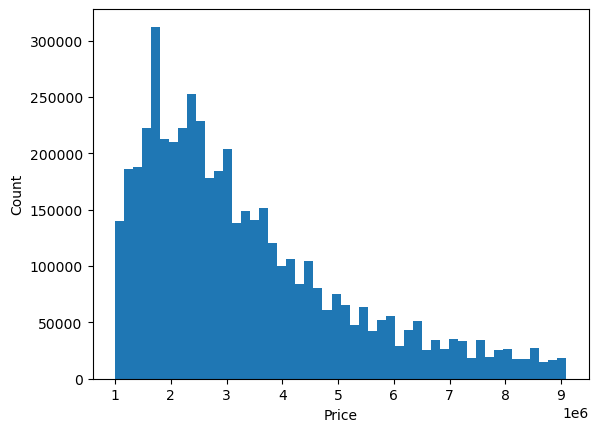

In [92]:
# Histogram of price
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

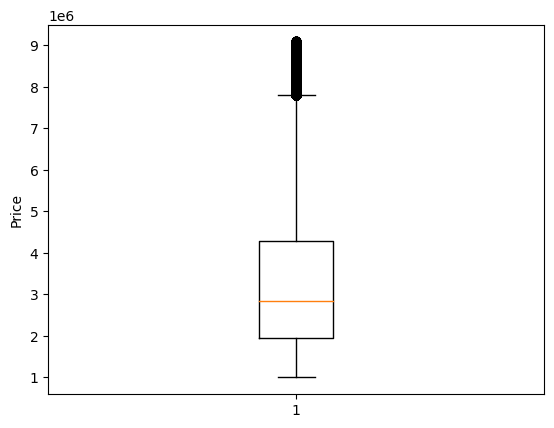

In [93]:
# Box plot of price
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.show()

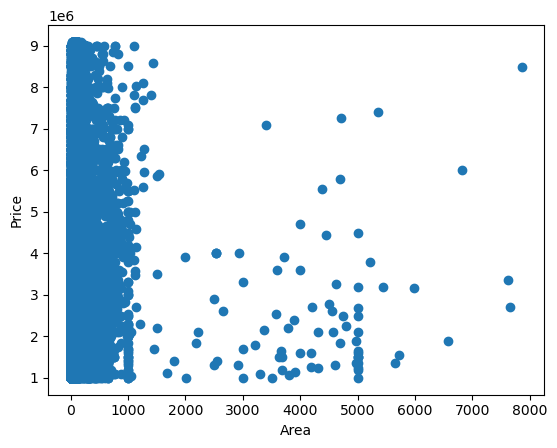

In [94]:
# Scatter plot of price vs area
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

<AxesSubplot:xlabel='rooms', ylabel='price'>

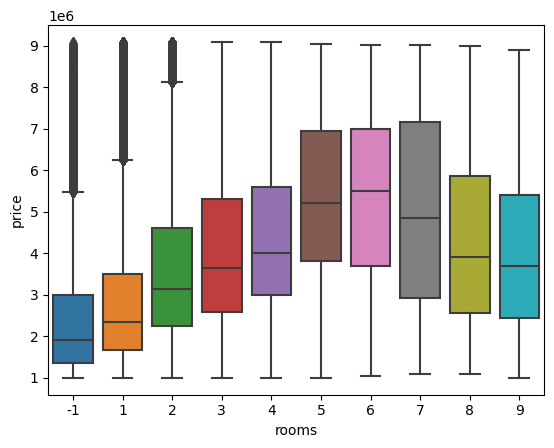

In [63]:
sns.boxplot(x='rooms', y='price', data=df)

In [64]:
# One-hot encode building_type
df_copy = df.copy()
building_type_dummies = pd.get_dummies(df_copy['building_type'], prefix='building_type')
df_copy = pd.concat([df_copy, building_type_dummies], axis=1)

# Drop original building_type column
df_copy = df_copy.drop('building_type', axis=1)


In [65]:
# One-hot encode object_type
object_type_dummies = pd.get_dummies(df_copy['object_type'], prefix='object_type')
df_copy = pd.concat([df_copy, object_type_dummies], axis=1)

# Drop original copy_type column
df_copy = df_copy.drop('object_type', axis=1)

In [66]:
df_copy.head()

,price,date,time,geo_lat,geo_lon,region,level,levels,rooms,area,kitchen_area,hour,building_type_0,building_type_1,building_type_2,building_type_3,building_type_4,building_type_5,object_type_1
4872043,1000000,2020-12-18,22:23:51,57.524,38.312,2604,1,4,2,42.000,6.000,22,0,0,0,1,0,0,1
4163730,1000000,2020-07-27,16:07:43,61.813,36.542,8090,1,2,2,50.000,7.000,16,0,0,0,0,1,0,1
2064544,1000000,2019-06-25,15:38:30,51.872,107.482,9579,1,3,2,46.500,9.200,15,0,0,0,1,0,0,1
3717075,1000000,2020-05-08,12:12:03,45.012,39.117,2843,3,5,-1,21.000,5.000,12,0,0,1,0,0,0,1
4164140,1000000,2020-07-27,16:55:45,43.681,43.515,9648,2,5,1,38.000,7.000,16,0,0,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import datetime

# Convert time strings to seconds since midnight
df['time'] = df['time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').timestamp() - datetime.datetime.strptime('00:00:00', '%H:%M:%S').timestamp())

# Scale the values to be between 0 and 1
df['time'] = df['time'] / (24 * 60 * 60)

df = df.reset_index(drop=True)
# Extract features and target
X = df.drop("price", axis=1)
y = df["price"]
# Extract year from date column
X["year"] = X["date"].dt.year
X = X.drop("date", axis=1)

# One-hot encode the categorical features
cat_features = ["building_type", "object_type"]
X_cat = X[cat_features]
encoder = OneHotEncoder(sparse=False, drop="first")
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_cat))
X_cat_encoded.columns = encoder.get_feature_names(cat_features)
X = X.drop(cat_features, axis=1)
X = pd.concat([X, X_cat_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
score = model.score(X_test, y_test)
print(f"R-squared score: {score:.3f}")



In [67]:
def linear_regression(df):
        # Convert time strings to seconds since midnight
    df['time'] = df['time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').timestamp() - datetime.datetime.strptime('00:00:00', '%H:%M:%S').timestamp())

    # Scale the values to be between 0 and 1
    df['time'] = df['time'] / (24 * 60 * 60)

    df = df.reset_index(drop=True)
    # Extract features and target
    X = df.drop("price", axis=1)
    y = df["price"]
    # Extract year from date column
    X["year"] = X["date"].dt.year
    X = X.drop("date", axis=1)

    # One-hot encode the categorical features
    cat_features = ["building_type", "object_type"]
    X_cat = X[cat_features]
    encoder = OneHotEncoder(sparse=False, drop="first")
    X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_cat))
    X_cat_encoded.columns = encoder.get_feature_names(cat_features)
    X = X.drop(cat_features, axis=1)
    X = pd.concat([X, X_cat_encoded], axis=1)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model on the testing set
    score = model.score(X_test, y_test)
    return score
    
print(linear_regression(df))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0.4160467150230638


In [101]:
def linear_regression(df):
    df = df.reset_index(drop=True)
    # Extract features and target
    X = df.drop("price", axis=1)
    y = df["price"]
    # Extract year from date column
    
    X["year"] = X["date"].dt.year
    X = X.drop("date", axis=1)
    X['time'] = X['time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').timestamp() - datetime.datetime.strptime('00:00:00', '%H:%M:%S').timestamp())
    # One-hot encode the categorical features
    cat_features = ["building_type", "object_type","rooms", "level"]
    X_cat = X[cat_features]
    encoder = OneHotEncoder(sparse=False, drop="first")
    X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_cat))
    X_cat_encoded.columns = encoder.get_feature_names_out(cat_features)
    X = X.drop(cat_features, axis=1)
    X = pd.concat([X, X_cat_encoded], axis=1)

    # Scale the numerical features
    num_features = ["area", "kitchen_area"]
    scaler = StandardScaler()
    X[num_features] = scaler.fit_transform(X[num_features])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model on the testing set
    score = model.score(X_test, y_test)
    return score

print(linear_regression(df))


0.4334998186004241


In [108]:
def kmeans_clustering(df, n):
    # Combine geo_lat and geo_lon columns into a numpy array
    X = df[['geo_lat', 'geo_lon']].values
    # Train a KMeans clustering model
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    # Extract the clusters for each data point
    clusters = kmeans.predict(X)
    df['clusters'] = clusters
    return df

df.head(20)


,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,hour,clusters
0,6050000,2018-02-19,20:00:21,59.806,30.376,2661,1,8,10,3,82.600,10.800,1,20,0
1,8650000,2018-02-27,12:04:54,55.684,37.297,81,3,5,24,2,69.100,12.000,1,12,0
2,4000000,2018-02-28,15:44:00,56.295,44.062,2871,1,5,9,3,66.000,10.000,1,15,0
3,1850000,2018-03-01,11:24:52,44.996,39.075,2843,4,12,16,2,38.000,5.000,1,11,3
4,5450000,2018-03-01,17:42:43,55.919,37.985,81,3,13,14,2,60.000,10.000,1,17,0
5,3300000,2018-03-02,21:18:42,55.908,37.726,81,1,4,5,1,32.000,6.000,1,21,0
6,4704280,2018-03-04,12:35:25,55.621,37.431,3,2,1,25,1,31.700,6.000,1,12,0
7,3600000,2018-03-04,20:52:38,59.876,30.395,2661,1,2,5,1,31.100,6.000,1,20,0
8,3390000,2018-03-05,07:07:05,53.195,50.107,3106,2,4,24,2,64.000,13.000,1,7,2
9,2800000,2018-03-06,09:57:10,55.737,38.846,81,1,9,10,2,55.000,8.000,1,9,0


In [121]:
def linear_regression_cluster(df, n):
    # Cluster the data based on geo_lat and geo_lon
    df = df.reset_index(drop=True)
    df = kmeans_clustering(df, n)
    # Extract features and target
    X = df.drop("price", axis=1)
    y = df["price"]
    # Extract year from date column
    
    X["year"] = X["date"].dt.year
    X = X.drop("date", axis=1)
    X['time'] = X['time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').timestamp() - datetime.datetime.strptime('00:00:00', '%H:%M:%S').timestamp())
    # One-hot encode the categorical features
    cat_features = ["building_type", "object_type","rooms", "level", "clusters"]
    X_cat = X[cat_features]
    encoder = OneHotEncoder(sparse=False, drop="first")
    X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_cat))
    X_cat_encoded.columns = encoder.get_feature_names_out(cat_features)
    X = X.drop(cat_features, axis=1)
    X = pd.concat([X, X_cat_encoded], axis=1)

    # Scale the numerical features
    num_features = ["area", "kitchen_area"]
    scaler = StandardScaler()
    X[num_features] = scaler.fit_transform(X[num_features])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model on the testing set
    score = model.score(X_test, y_test)
    return score
linear_regression_cluster(df, 50)

0.5986376677839418

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import datetime

def ridge_regression_cluster(df, n):
    # Cluster the data based on geo_lat and geo_lon
    df = df.reset_index(drop=True)
    df = kmeans_clustering(df, n)
    # Extract features and target
    X = df.drop("price", axis=1)
    y = df["price"]
    # Extract year from date column
    X["year"] = X["date"].dt.year
    X = X.drop("date", axis=1)
    X['time'] = X['time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').timestamp() - datetime.datetime.strptime('00:00:00', '%H:%M:%S').timestamp())
    # One-hot encode the categorical features
    cat_features = ["building_type", "object_type","rooms", "level", "clusters"]
    X_cat = X[cat_features]
    encoder = OneHotEncoder(sparse=False, drop="first")
    X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_cat))
    X_cat_encoded.columns = encoder.get_feature_names_out(cat_features)
    X = X.drop(cat_features, axis=1)
    X = pd.concat([X, X_cat_encoded], axis=1)

    # Scale the numerical features
    num_features = ["area", "kitchen_area"]
    scaler = StandardScaler()
    X[num_features] = scaler.fit_transform(X[num_features])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a ridge regression model
    model = Ridge(alpha=0.5)
    model.fit(X_train, y_train)

    # Evaluate the model on the testing set
    score = model.score(X_test, y_test)
    return score
ridge_regression_cluster(df, 100)

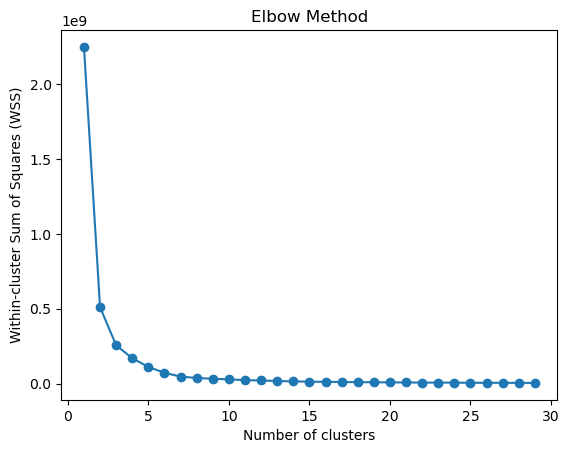

In [117]:
# Elbow method for calculating optimal number of clusters
# Fail-Lasted too long
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# define range of cluster numbers to test
cluster_range = range(1, 30)

# calculate the WSS value for each cluster number
wss = []
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(cluster_range, wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method')
plt.show()


In [118]:
# Silhouette method for calculating optimal number of clusters
# Fail-Lasted too long
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df[['geo_lat', 'geo_lon']].values

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("optimal number of clusters:", best_n_clusters)


KeyboardInterrupt: 